In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# matplotlib.style.use('ggplot')

In [2]:
path = 'http://cs.joensuu.fi/sipu/datasets/spiral.txt'
data = pd.read_table(path,sep='\s+', header=None)
data.head()

,0,1,2
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [3]:
data.describe()  # No need to scale

,0,1,2
count,312.000000,312.000000,312.000000
mean,18.408173,16.344712,2.016026
std,7.299923,6.867232,0.815682
min,3.000000,2.900000,1.000000
25%,12.912500,11.337500,1.000000
50%,18.325000,16.050000,2.000000
75%,23.400000,21.362500,3.000000
max,31.950000,31.650000,3.000000


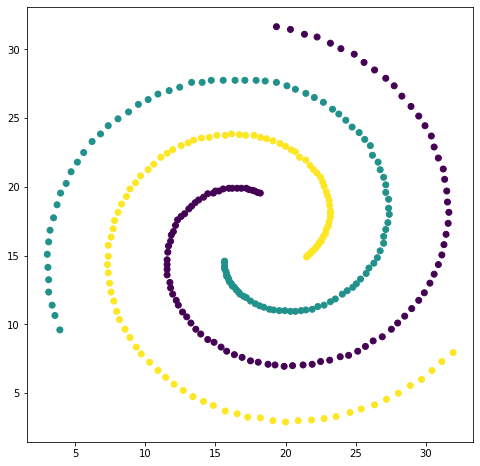

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data.iloc[:,2])
plt.show()

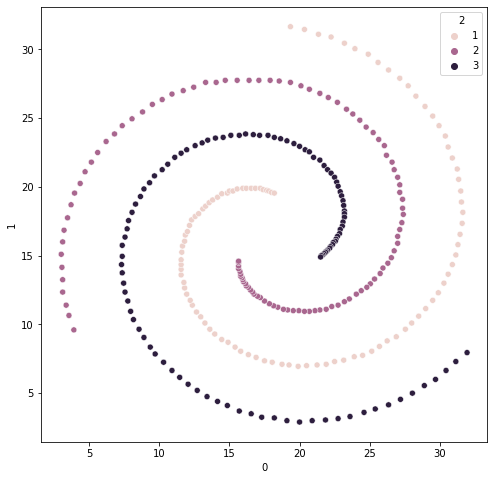

In [5]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1], hue=data.iloc[:,2])
plt.show()

In [6]:
# since we have chain like structure so we can extract these cluster using hierarchical cluster with single linkage
from sklearn.metrics import pairwise_distances

In [7]:
d_mat = pairwise_distances(X=data.iloc[:,:2])

In [8]:
d_mat

array([[ 0.        ,  1.03077641,  1.98494332, ..., 17.47512518,
        17.56680107, 17.60433185],
       [ 1.03077641,  0.        ,  0.95524866, ..., 16.98683314,
        17.09064071, 17.13300908],
       [ 1.98494332,  0.95524866,  0.        , ..., 16.63730747,
        16.75298481, 16.8000744 ],
       ...,
       [17.47512518, 16.98683314, 16.63730747, ...,  0.        ,
         0.25      ,  0.35      ],
       [17.56680107, 17.09064071, 16.75298481, ...,  0.25      ,
         0.        ,  0.1       ],
       [17.60433185, 17.13300908, 16.8000744 , ...,  0.35      ,
         0.1       ,  0.        ]])

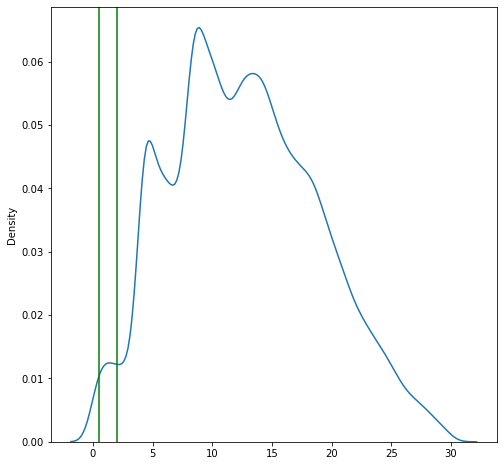

In [9]:
plt.figure(figsize=(8,8))
sns.kdeplot(d_mat.flatten())
plt.axvline(x=0.5,color='green')
plt.axvline(x=2,color='green')
plt.show()

In [10]:
from scipy.stats import gaussian_kde

In [11]:
kde = gaussian_kde(d_mat.flatten())

In [12]:
x_vals = np.linspace(0.5,2,num=300)

In [13]:
x_densities = kde(x_vals)
x_densities

array([0.01038675, 0.01041455, 0.01044215, 0.01046956, 0.01049677,
       0.01052379, 0.0105506 , 0.01057722, 0.01060364, 0.01062986,
       0.01065588, 0.0106817 , 0.01070732, 0.01073274, 0.01075795,
       0.01078296, 0.01080777, 0.01083238, 0.01085679, 0.01088099,
       0.01090499, 0.01092878, 0.01095237, 0.01097575, 0.01099893,
       0.01102191, 0.01104468, 0.01106725, 0.01108961, 0.01111176,
       0.01113371, 0.01115546, 0.011177  , 0.01119833, 0.01121946,
       0.01124039, 0.01126111, 0.01128162, 0.01130193, 0.01132204,
       0.01134194, 0.01136164, 0.01138113, 0.01140043, 0.01141951,
       0.0114384 , 0.01145708, 0.01147556, 0.01149384, 0.01151191,
       0.01152979, 0.01154746, 0.01156493, 0.01158221, 0.01159928,
       0.01161616, 0.01163283, 0.01164931, 0.0116656 , 0.01168168,
       0.01169757, 0.01171326, 0.01172876, 0.01174406, 0.01175917,
       0.01177409, 0.01178882, 0.01180335, 0.01181769, 0.01183184,
       0.01184581, 0.01185958, 0.01187317, 0.01188656, 0.01189

In [14]:
eps_radius = x_vals[x_densities==max(x_densities)]
eps_radius

array([1.37792642])

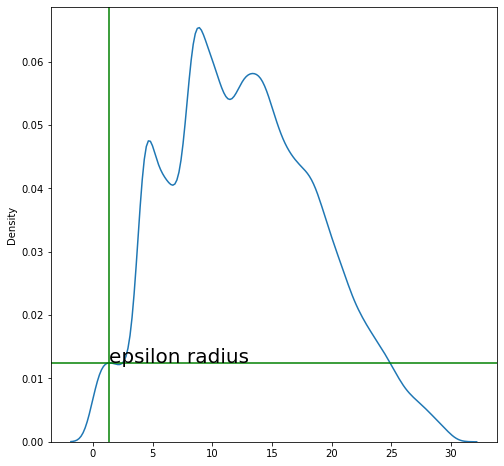

In [15]:
plt.figure(figsize=(8,8))
sns.kdeplot(d_mat.flatten())
# plt.axvline(x=0.5,color='green')
# plt.axvline(x=2,color='green')
plt.axvline(x=eps_radius,c='green')
plt.axhline(y=max(x_densities),c='green')
plt.text(x=eps_radius,y=max(x_densities),s='epsilon radius',size=20)
plt.show()

In [16]:
d_mat_bool = (d_mat<=eps_radius)
d_mat_bool

array([[ True,  True, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [17]:
pts_within_eps = d_mat_bool.sum(axis=0)
pts_within_eps

array([ 2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  3,  5,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  7,  7,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  9,  9, 10, 11, 11, 12, 13, 15, 15, 16, 16, 15, 15, 14, 14, 13,
       13, 12, 11, 10,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  3,  4,  3,  4,  4,  5,  4,  4,  4,  4,  4,  5,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  5,  7,  7,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        8,  7,  7,  8,  9,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10,  9,  8,
        8,  7,  6,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

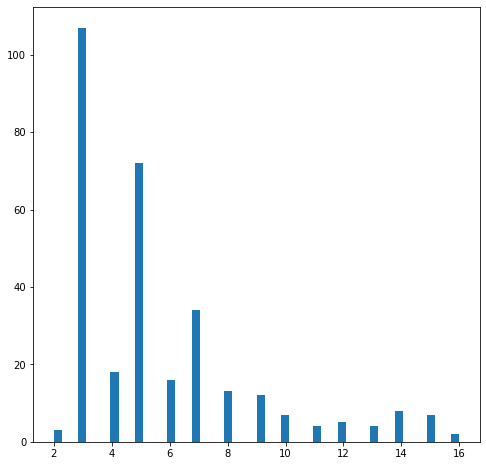

In [18]:
plt.figure(figsize=(8,8))
d = plt.hist(pts_within_eps,bins=50)
plt.show()

In [19]:
# from histogram above
minpts = 3

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
dbs = DBSCAN(eps=eps_radius,min_samples=minpts)

In [22]:
dbs.fit(data.iloc[:,:2])

DBSCAN(eps=array([1.37792642]), min_samples=3)

In [23]:
clust = dbs.fit_predict(data.iloc[:,:2])
clust

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

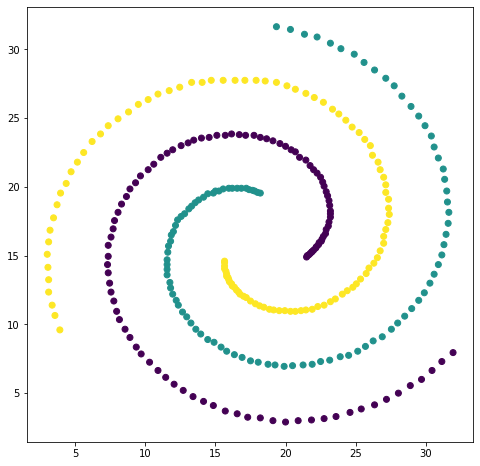

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=clust)
plt.show()

# With other dataset

In [114]:
path = 'http://cs.joensuu.fi/sipu/datasets/jain.txt'
data = pd.read_table(path,sep='\s+', header=None)
data.head()

,0,1,2
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


In [115]:
# data = pd.concat([data,data+1])

In [116]:
data.describe()  # Try with scaling also

,0,1,2
count,373.000000,373.000000,373.000000
mean,24.330697,12.145979,1.260054
std,9.853372,6.605375,0.439253
min,0.750000,2.950000,1.000000
25%,17.350000,6.300000,1.000000
50%,23.150000,11.250000,1.000000
75%,33.350000,16.500000,2.000000
max,41.300000,27.850000,2.000000


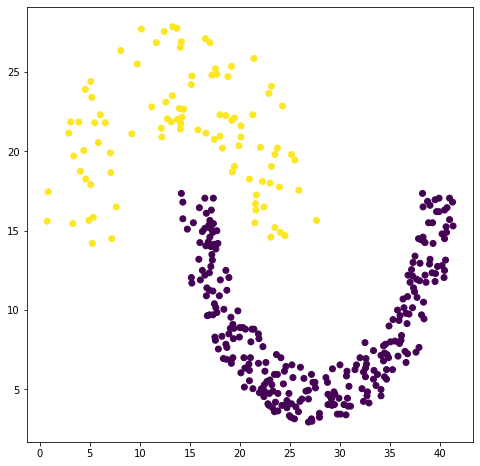

In [117]:
plt.figure(figsize=(8,8))
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=data.iloc[:,2])
plt.show()

In [118]:
d_mat = pairwise_distances(data.iloc[:,:2])
print(d_mat.shape)
d_mat

(373, 373)


array([[3.37174788e-07, 1.85270073e+00, 3.16267292e+00, ...,
        3.74001337e+01, 3.86532340e+01, 3.90520486e+01],
       [1.85270073e+00, 0.00000000e+00, 2.55440795e+00, ...,
        3.75408111e+01, 3.87735090e+01, 3.91768426e+01],
       [3.16267292e+00, 2.55440795e+00, 0.00000000e+00, ...,
        3.50016071e+01, 3.62310640e+01, 3.66349560e+01],
       ...,
       [3.74001337e+01, 3.75408111e+01, 3.50016071e+01, ...,
        0.00000000e+00, 1.31244047e+00, 1.67705098e+00],
       [3.86532340e+01, 3.87735090e+01, 3.62310640e+01, ...,
        1.31244047e+00, 0.00000000e+00, 4.12310563e-01],
       [3.90520486e+01, 3.91768426e+01, 3.66349560e+01, ...,
        1.67705098e+00, 4.12310563e-01, 0.00000000e+00]])

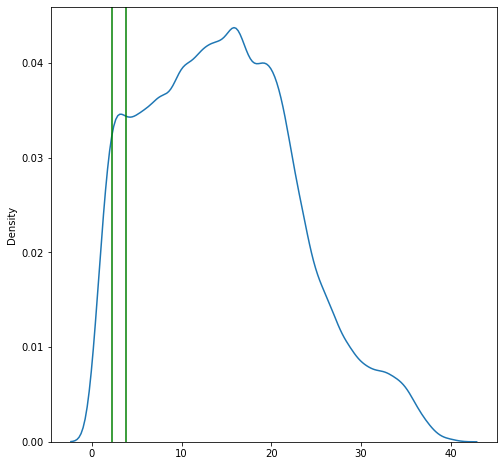

In [119]:
plt.figure(figsize=(8,8))
d = sns.kdeplot(d_mat.flatten())
plt.axvline(x=2.2,c='g')
plt.axvline(x=3.8,c='g')
plt.show()

In [120]:
kde = gaussian_kde(d_mat.flatten())
kde

In [121]:
x_vals = np.linspace(2.2,3.8,num=1000)
x_densities = kde(x_vals)
# x_densities

In [122]:
eps_radius = x_vals[x_densities==max(x_densities)]
eps_radius

array([3.21221221])

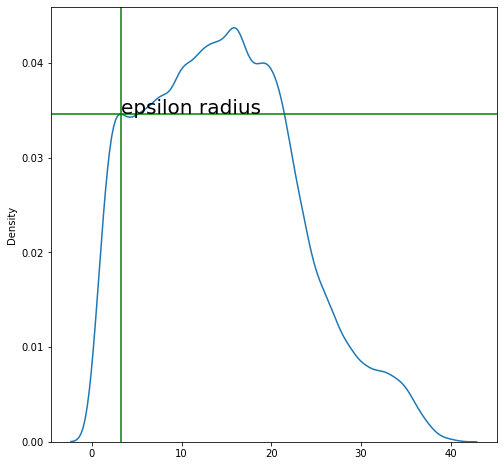

In [123]:
plt.figure(figsize=(8,8))
d = sns.kdeplot(d_mat.flatten())
plt.axvline(x=eps_radius,c='g')
plt.axhline(y=max(x_densities),c='g')
plt.text(x=eps_radius,y=max(x_densities),s='epsilon radius',size=20)
plt.show()

In [124]:
d_mat_bool =(d_mat<=eps_radius)
d_mat_bool

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [125]:
pts_within_eps = d_mat_bool.sum(axis=0)
pts_within_eps

array([ 3,  3,  8,  5,  8,  9, 12, 11, 10, 10,  9, 10, 13, 14,  5,  6,  9,
       10, 15, 13, 12, 11,  9,  9,  7,  3,  6,  5,  6, 15, 15, 16,  8,  7,
        7,  7, 10, 11, 17, 16, 14, 14, 14, 15, 17, 17, 17, 17, 17, 16, 11,
       11, 11, 10, 10,  9, 11,  5, 16, 15, 14, 14, 14, 16, 18, 14, 15, 14,
       15, 15, 16, 16, 11,  5,  5,  7, 17, 16, 16, 15, 13, 12, 14, 16, 15,
       12, 10, 10,  8, 17, 18,  8,  2,  9, 12,  9,  8, 10, 15, 21, 30, 30,
       27, 26, 25, 29, 29, 32, 35, 39, 38, 30, 26, 29, 32, 31, 32, 33, 33,
       36, 40, 41, 41, 39, 38, 40, 41, 41, 42, 41, 40, 42, 35, 35, 35, 40,
       41, 40, 36, 34, 40, 40, 41, 40, 40, 41, 41, 37, 35, 40, 45, 36, 34,
       33, 40, 46, 44, 46, 43, 39, 40, 45, 43, 43, 42, 39, 35, 35, 39, 37,
       35, 35, 32, 44, 47, 47, 45, 35, 43, 48, 49, 51, 35, 40, 43, 49, 40,
       48, 49, 39, 38, 42, 45, 48, 47, 49, 52, 53, 53, 52, 51, 49, 41, 35,
       50, 53, 52, 50, 46, 44, 42, 42, 39, 45, 41, 50, 49, 49, 49, 53, 53,
       46, 39, 45, 42, 46

In [126]:
# plt.figure(figsize=(30,8))
# d = plt.hist(pts_within_eps,bins=100)
# plt.xticks(d[0], rotation=90)
# plt.show()

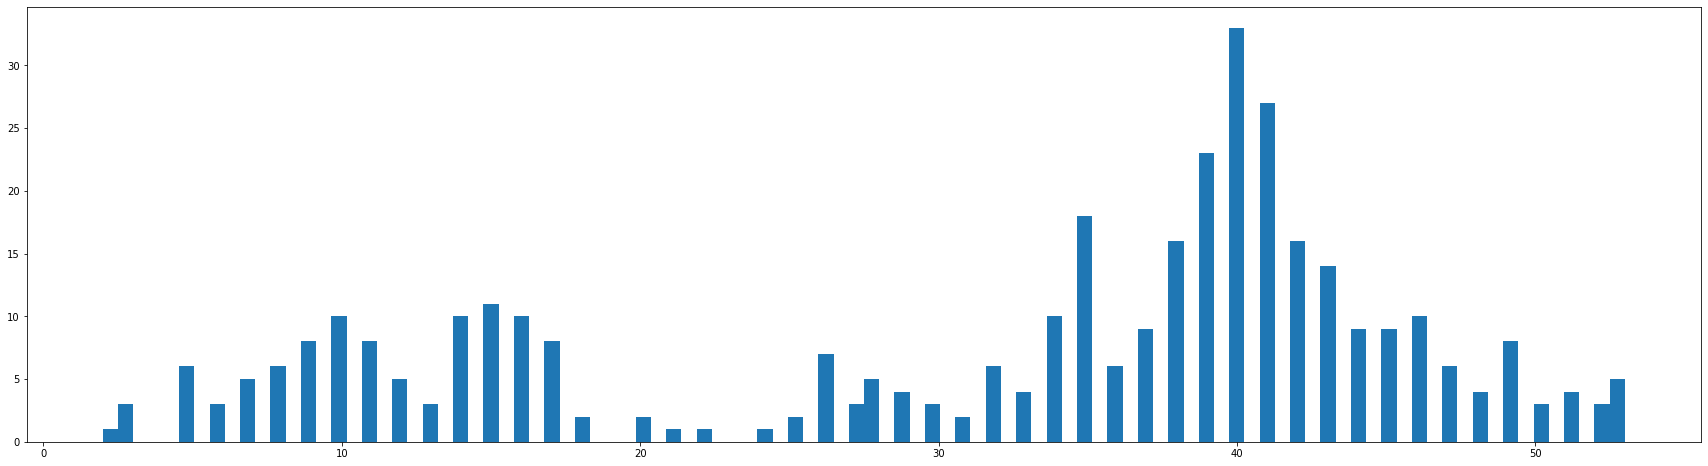

In [127]:
plt.figure(figsize=(30,8))
d = plt.hist(pts_within_eps,bins=100)
# plt.xticks(list(range(0,55)), rotation=90)
plt.show()

In [128]:
eps_radius

array([3.21221221])

In [129]:
minpts=40
dbs2=DBSCAN(eps=eps_radius[0],min_samples=minpts,n_jobs=3)
# dbs2.fit(data.iloc[:,:2])
clust=dbs2.fit_predict(data.iloc[:,:2])
clust

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

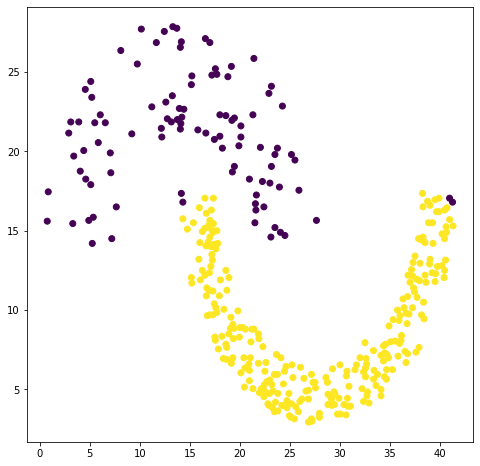

In [130]:
plt.figure(figsize=(8,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=clust)
plt.show()

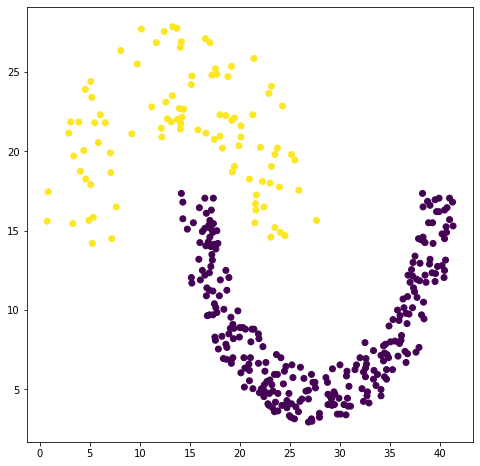

In [131]:
plt.figure(figsize=(8,8))
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=data.iloc[:,2])
plt.show()

In [132]:
# for r in np.linspace(1,5,1000):
#     for p in list(range(1,30)):
#         dbs2=DBSCAN(eps=eps_radius[0],min_samples=minpts,n_jobs=3)

In [133]:
data.iloc[:,2].value_counts()

1    276
2     97
Name: 2, dtype: int64

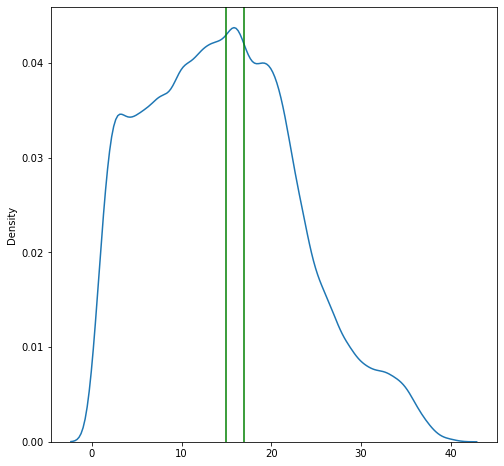

In [134]:
plt.figure(figsize=(8,8))
d = sns.kdeplot(d_mat.flatten())
plt.axvline(x=15,c='g')
plt.axvline(x=17,c='g')
plt.show()

In [135]:
kde = gaussian_kde(d_mat.flatten())
kde

In [136]:
x_vals = np.linspace(15,17,num=1000)
x_densities = kde(x_vals)
# x_densities

In [137]:
eps_radius = x_vals[x_densities==max(x_densities)]
eps_radius

array([15.85685686])

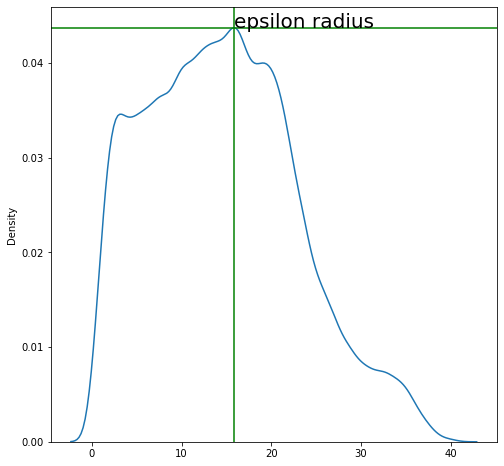

In [138]:
plt.figure(figsize=(8,8))
d = sns.kdeplot(d_mat.flatten())
plt.axvline(x=eps_radius,c='g')
plt.axhline(y=max(x_densities),c='g')
plt.text(x=eps_radius,y=max(x_densities),s='epsilon radius',size=20)
plt.show()

In [139]:
d_mat_bool =(d_mat<=eps_radius)
d_mat_bool

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [140]:
pts_within_eps = d_mat_bool.sum(axis=0)
pts_within_eps

array([ 59,  58, 102, 130, 125, 133, 125, 120, 111,  99,  86,  86,  98,
       111, 160, 159, 143, 135, 122, 112, 122, 114, 104,  93,  94, 105,
       112, 126, 150, 151, 156, 153, 127, 123, 119, 121, 133, 136, 152,
       149, 174, 168, 167, 169, 171, 168, 168, 171, 175, 177, 148, 148,
       147, 134, 131, 137, 144, 120, 180, 184, 187, 187, 201, 176, 177,
       179, 177, 178, 189, 198, 216, 222, 166, 140, 135, 146, 196, 233,
       252, 260, 264, 275, 286, 247, 245, 232, 219, 271, 296, 274, 309,
       340, 331, 312, 316, 324, 327, 208, 214, 222, 232, 233, 230, 226,
       233, 237, 236, 240, 240, 242, 249, 244, 244, 238, 239, 242, 244,
       249, 249, 248, 249, 249, 249, 251, 252, 252, 251, 252, 251, 252,
       245, 249, 247, 247, 250, 250, 250, 256, 258, 260, 255, 252, 253,
       251, 249, 250, 249, 245, 243, 268, 263, 239, 239, 237, 242, 263,
       256, 258, 250, 244, 244, 252, 255, 258, 261, 262, 235, 236, 243,
       241, 240, 271, 272, 262, 249, 245, 236, 232, 241, 245, 24

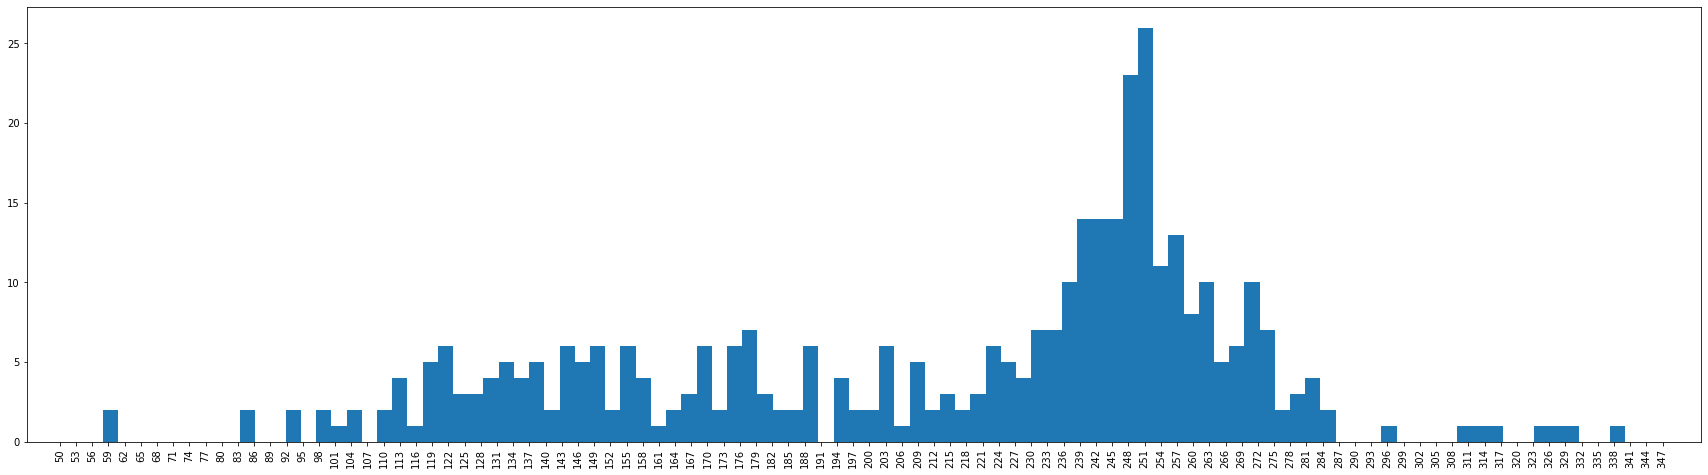

In [141]:
plt.figure(figsize=(30,8))
d = plt.hist(pts_within_eps,bins=100)
plt.xticks(list(range(50,350,3)), rotation=90)
plt.show()

In [142]:
eps_radius[0]

15.856856856856856

In [143]:
minpts=34
dbs2=DBSCAN(eps=eps_radius[0],min_samples=minpts,n_jobs=3)
# dbs2.fit(data.iloc[:,:2])
clust=dbs2.fit_predict(data.iloc[:,:2])
clust

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

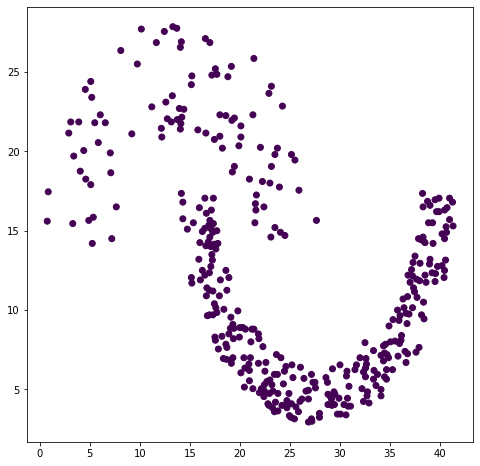

In [144]:
plt.figure(figsize=(8,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=clust)
plt.show()